In [167]:
#Allow matplotlib to plot inside this notebook

%matplotlib inline

In [168]:
#Python imports

import os
import time 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image
from mpl_toolkits.mplot3d import axes3d, Axes3D

from scipy import stats
from sklearn.datasets.samples_generator import make_regression 

In [169]:
#Call path to apple.csv file and read into notebook

data=pd.read_csv("/Users/lilige/documents/Course_material_dev/appledata.csv",skipinitialspace=True)

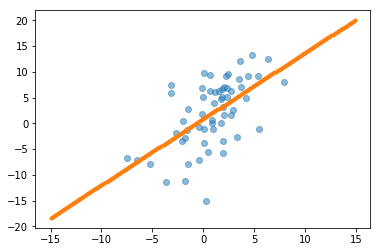

In [170]:
#Extract the specific values from the csv files and drop NA's, remove percent signs

data=data.dropna()
data['Return(AAPL) rAAPL']=data['Return(AAPL) rAAPL'].str.replace('%', ' ')
data['Return(AAPL) rAAPL']=data['Return(AAPL) rAAPL'].astype(float)
data['Return(SP500) rSP500']=data['Return(SP500) rSP500'].str.replace('%',' ')
data['Return(SP500) rSP500']=data['Return(SP500) rSP500'].astype(float)
y = data['Return(AAPL) rAAPL']
y=np.array(y)
x = data['Return(SP500) rSP500']
x = np.array(x)
slope, intercept, _,_,_ = stats.linregress(x,t)
best_fit=np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-15,15,0.1)
plt.plot(grid, best_fit(grid), '.')

In [171]:
#Calculate the Cost Function (J)

def error(X,Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

def gradient_descent(x,y, theta_init, step=0.001, maxsteps=1000, precision=0.001,):
    costs=[] #To store the cost values
    m=y.size #Number of data points
    theta= theta_init
    history=[] #to store all thetas
    preds=[]
    counter = 0
    
    oldcost=0
    pred=np.dot(x, theta) #Gives the predicted value of the target variable -y
    error=pred-y
    currentcost=np.sum(error ** 2)/(2*m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta) #Contains all the values of theta during the regression
    counter +=1
    
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient=x.T.dot(error)/m #Calculate the value of the gradient
        theta = theta - step * gradient #Update the value of theta
        history.append(theta)
        pred=np.dot(x, theta)
        error=pred-y
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append (currentcost)
        if counter % 25 == 0:
            pred.append(pred)
            counter+=1
        if maxsteps:
            if counter==maxsteps:
                break
            
    return history, costs, preds, counter

xaug = np.c_[np.ones(x.shape[0]),x]
theta_i= [-5, 4] + np.random.rand(2) #Initial guess of Theta
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.01)
theta = history[-1]

print ("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print ("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: 0.56, 1.32 1
Least Squares: 0.90, 1.28


/Users/lilige/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'offset', 'stride'
  s)


Text(0.5,0.92,'For Finding the minimum J($\\Theta_0,\\Theta_1$)')

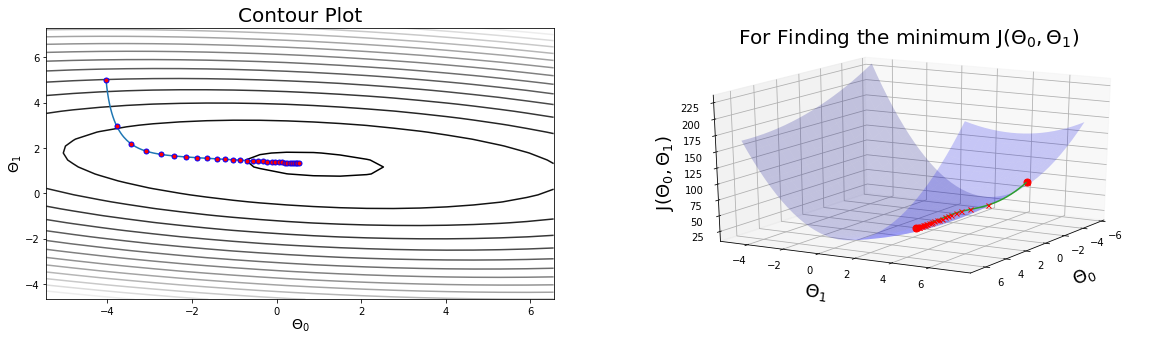

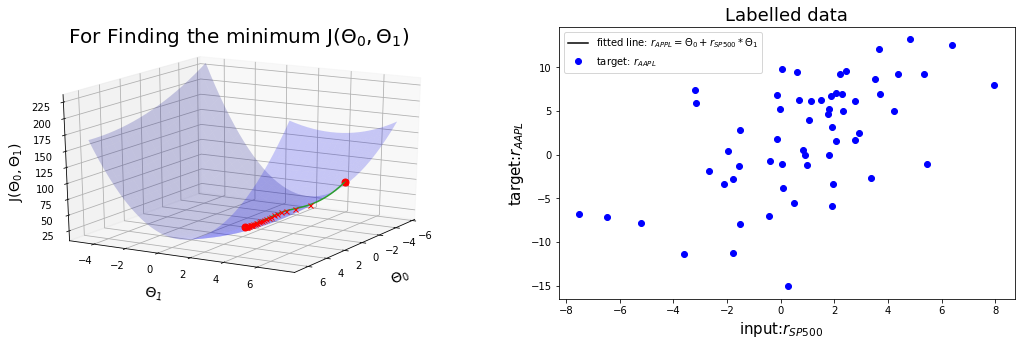

In [172]:
#Animation to show how the regression is formed

x_gd=[h[0] for h in history] #Stores all the values of theta_o
y_gd = [h[1] for h in history] #Stores all the values of theta_1

ms = np.linspace(theta[0] - 6, theta[0] + 6, 20)
bs= np.linspace(theta[1] - 6, theta[1] + 6, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) for theta in zip(np.ravel(M), np.ravel(B))])
Z=zs.reshape(M.shape)

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)

#Plot the contour figure

ax1.contour(M,B,Z,20,color='b',alpha=1, offset=0, stride=30, cmap=plt.get_cmap('gist_gray'))
ax1.set_xlabel(r'$\Theta_0$',labelpad=1, fontsize=14)
ax1.set_ylabel(r'$\Theta_1$', labelpad=1, fontsize=14)

ax1.plot([t[0] for t in history], [t[1] for t in history], markerfacecolor='r', markeredgecolor='b', marker='o', markevery=10, markersize=5)

ax1.set_title("Contour Plot", fontsize=20) #Center title with same font as other plots

#To plot the 3D gradient figure

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.plot_surface(M,B,Z,rstride=1, cstride=1, color='b', alpha=0.2)

fig1=plt.figure(figsize=(18,5)) #Reduce width by two to better fit on page
ax21 = fig1.add_subplot(1,2,1, projection='3d')
ax21.set_xlabel(r'$\Theta_0$', labelpad=15, fontsize=14) #Reduce fontsize for better fitting on page
ax21.set_ylabel(r'$\Theta_1$', labelpad=15, fontsize=14)

#rotate z axies for better readibility
ax21.zaxis.set_rotate_label(False) #turn off auto-rotation of label
ax21.set_zlabel('J('r'$\Theta_0,\Theta_1$)', labelpad=5, fontsize=14, rotation=90) #rotate axis for better readibility

ax21.view_init(elev=20., azim=30)
ax21.plot([theta[0]], [theta[1]], [cost[-1]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax21.plot([history[0][0]], [history[0][1]], [cost[0]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)

ax21.plot([t[0] for t in history], [t[1] for t in history], cost, markerfacecolor='k', markeredgecolor='r', marker='x', markevery=10, markersize=5)
ax21.plot_surface(M,B,Z,rstride=1, cstride=1, color='b', alpha=0.2)

ax21.set_title("For Finding the minimum J("r"$\Theta_0,\Theta_1$)", fontsize=20) #Increase font size and center title

#To plot the 2D fitted line

ax3 = fig1.add_subplot(1,2,2)
ax3.plot([],[],'k-', label='fitted line: $r_{APPL}=\Theta_0 + r_{SP500}*\Theta_1$')
ax3.plot(x,y,'bo',label='target: $r_{AAPL}$')
ax3.set_xlabel('input:$r_{SP500}$   ', fontsize=15,horizontalalignment='center') #Add spaces to better center xlabel

ax3.set_ylabel('target:$r_{AAPL}$', fontsize=15)
ax3.set_title('Labelled data', fontsize=18)
ax3.legend(loc=2)

ax2.set_xlabel(r'$\Theta_0$', labelpad=15, fontsize=18)
ax2.set_ylabel(r'$\Theta_1$', labelpad=15, fontsize=18)
ax2.zaxis.set_rotate_label(False)
ax2.set_zlabel('J('r'$\Theta_0,\Theta_1$)', labelpad=5, fontsize=18, rotation=90)
ax2.view_init(elev=20., azim=30)
ax2.plot([theta[0]], [theta[1]], [cost[-1]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax2.plot([history[0][0]], [history[0][1]], [cost[0]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax2.plot([t[0] for t in history], [t[1] for t in history], cost, markerfacecolor='k', markeredgecolor='r', marker='x', markevery=10, markersize=5)
ax2.set_title("For Finding the minimum J("r"$\Theta_0,\Theta_1$)", fontsize=20) #insert centered title

In [173]:
#Create animation

x_gd=[h[0] for h in history] #Stores all the values of theta_0
y_gd=[h[1] for h in history] #Stores all the value of theta_1
x_gd[2]
line1, = ax2.plot([],[], [])
line11, =ax21.plot([],[],[])
line2, = ax3.plot([], [], 'k-')
point1, =ax2.plot([],[],[],'wo')
point11, =ax21.plot([],[],[],'wo')
point2, =ax1.plot([],[],'kx')
line_1, =ax1.plot([], [], 'r-')
display_value1 = ax2.text(2., 2., 27.5, '', transform=ax2.transAxes,fontsize=12)
display_value11 = ax21.text(2., 2., 27.5, '', transform=ax21.transAxes,fontsize=12)

def init1():
    line1.set_data([],[])
    line_1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    point2.set_data([],[])
    point1.set_3d_properties([])
    display_value1.set_text('')
    return line1, point1, display_value1

def init11():
    line11.set_data([], [])
    line11.set_3d_properties([])
    line2.set_data([],[])
    point11.set_data([],[])
    point2.set_data([],[])
    point11.set_3d_properties([])
    display_value11.set_text('')
    return line11, point11, display_value11

In [158]:
#Animate line, points, display value

def animate1(i):
    line1.set_3d_properties(cost[i])
    point1.set_data(x_gd[i], y_gd[i])
    point2.set_data(x_gd[i], y_gd[i])
    point1.set_3d_properties(cost[i])
    line2.set_data(xaug[:,1], y_gd[i]*xaug[:,1] + x_gd[i])
    display_value1.set_text('Min J= ' + str(round(cost[i],3))) #Add J to label
    return line1, point1, display_value1

def animate11(i):
    line11.set_3d_properties(cost[i])
    point11.set_data(x_gd[i], y_gd[i])
    point2.set_data(x_gd[i], y_gd[i])
    point11.set_3d_properties(cost[i])
    ax3.set_title('Labelled data for $\Theta_0$ = {:.3f} and $\Theta_1$ = {:.3f}'.format(x_gd[i], y_gd[i]), fontsize=20)
    line2.set_data(xaug[:,1], y_gd[i]*xaug[:,1] + x_gd[i])
    display_value11.set_text('Min J= ' + str(round(cost[i],3))) #Add J to label
    return line11, point11, display_value11
    ax2.legend(loc=2)
    ax21.legend(loc=2)
    ax3.legend(loc=2)

anim2=animation.FuncAnimation(fig,animate1, init_func=init1, frames=len(x_gd), interval=250, repeat_delay=60, blit=True)
anim3=animation.FuncAnimation(fig1, animate11, init_func=init11, frames=len(x_gd), interval=250, repeat_delay=60, blit=True)

In [180]:
#Plot first animation as widget

HTML(anim2.to_html5_video())

In [181]:
#Plot second animation as widget

HTML(anim3.to_html5_video())

In [176]:
#Write out video files

anim2.save('multivariable1_rev.mp4', fps=20)
anim3.save('multivariable2_rev.mp4', fps=20)

In [177]:
#sources:
#http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/